<a href="https://colab.research.google.com/github/cvjeongwon/MLP/blob/main/4_1_2_EDA%26preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 4.1.2 데이터 분석 및 전처리

### 데이터 불러오기 및 분석하기

4.1 장에서 사용할 데이터인 영화 리뷰 데이터를 불러온 후 탐색적 데이터 분석 과정을 진행한다.  
데이터 분석은 다음의 순서로 진행한다.

* 데이터 크기
* 데이터의 개수
* 각 리뷰의 문자 길이 분포
* 많이 사용된 단어
* 긍, 부정 데이터의 분포
* 각 리뷰의 단어 개수 분포
* 특수문자 및 대, 소문자 비율 

In [75]:
import zipfile

In [76]:
DATA_IN_PATH = './data_in/'

In [77]:
file_list = ['labeledTrainData.tsv.zip', 'unlabeledTrainData.tsv.zip', 'testData.tsv.zip']

for file in file_list:
    zipRef = zipfile.ZipFile(DATA_IN_PATH + file, 'r')
    zipRef.extractall(DATA_IN_PATH)
    zipRef.close()

In [78]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 데이터 크기

In [79]:
# 디렉토리 내의 파일 목록(파일과 디렉토리)을 조회하여 file 리스트에 반환
# 하나씩 꺼내와서 반복문 수행
# 파일이름에 'tsv'포함하고, 'zip'문자열이 포함되어있지 않은 경우
# file.ljust(30): 파일명을 30자리로 맞춰 출력
# 파일 크기를 os.path.getsize(DATA_IN_PATH + file) / 1000000) 바이트를 MB단위로 변환하여 출력 
print("파일 크기 : ")
for file in os.listdir(DATA_IN_PATH):
    if 'tsv' in file and 'zip' not in file:
        print(file.ljust(30) + str(round(os.path.getsize(DATA_IN_PATH + file) / 1000000, 2)) + 'MB')

파일 크기 : 
testData.tsv                  32.72MB
labeledTrainData.tsv          33.56MB
unlabeledTrainData.tsv        67.28MB


In [80]:
train_data = pd.read_csv( DATA_IN_PATH + 'labeledTrainData.tsv', header = 0, delimiter = '\t', quoting = 3)
train_data.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


### 데이터 개수

In [81]:
print('전체 학습데이터의 개수: {}'.format(len(train_data)))

전체 학습데이터의 개수: 25000


### 각 리뷰의 문자 길이 분포

In [82]:
train_length = train_data['review'].apply(len)

In [83]:
train_length.head()

0    2304
1     948
2    2451
3    2247
4    2233
Name: review, dtype: int64

Text(0, 0.5, 'Number of review')

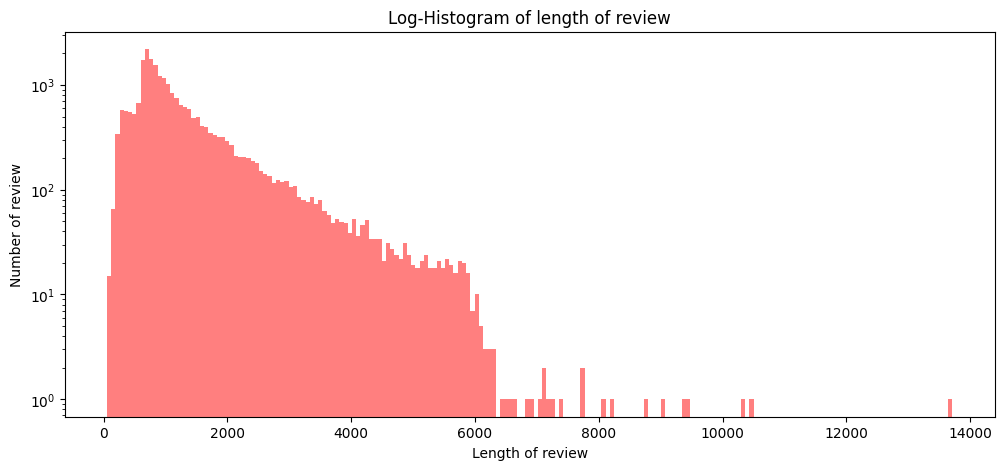

In [86]:
# 그래프에 대한 이미지 사이즈 선언
# figsize: (가로, 세로) 형태의 튜플로 입력
plt.figure(figsize=(12, 5))
# 히스토그램 선언
# bins: 히스토그램 값들에 대한 버켓 범위
# range: x축 값의 범위
# alpha: 그래프 색상 투명도
# color: 그래프 색상
# label: 그래프에 대한 라벨
plt.hist(train_length, bins=200, alpha=0.5, color= 'r', label='word')
# plt.yscale('log', nonposy='clip')
plt.yscale('log')
# 그래프 제목
plt.title('Log-Histogram of length of review')
# 그래프 x 축 라벨
plt.xlabel('Length of review')
# 그래프 y 축 라벨
plt.ylabel('Number of review')

In [87]:
print('리뷰 길이 최대 값: {}'.format(np.max(train_length)))
print('리뷰 길이 최소 값: {}'.format(np.min(train_length)))
print('리뷰 길이 평균 값: {:.2f}'.format(np.mean(train_length)))
print('리뷰 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('리뷰 길이 중간 값: {}'.format(np.median(train_length)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('리뷰 길이 제 1 사분위: {}'.format(np.percentile(train_length, 25)))
print('리뷰 길이 제 3 사분위: {}'.format(np.percentile(train_length, 75)))

리뷰 길이 최대 값: 13710
리뷰 길이 최소 값: 54
리뷰 길이 평균 값: 1329.71
리뷰 길이 표준편차: 1005.22
리뷰 길이 중간 값: 983.0
리뷰 길이 제 1 사분위: 705.0
리뷰 길이 제 3 사분위: 1619.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7f7eb72252b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7eb7225c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7eb7225130>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7eb6f25310>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7eb6efe1f0>],
 'means': [<matplotlib.lines.Line2D at 0x7f7eb9974e50>]}

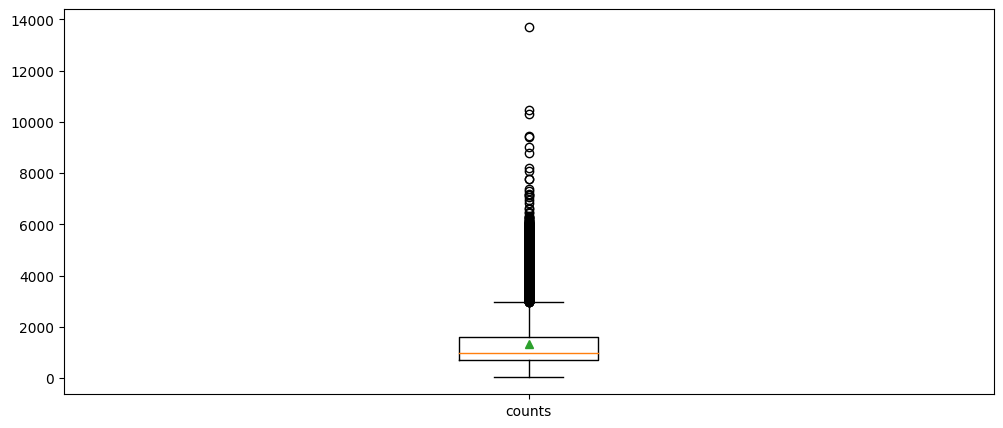

In [88]:
plt.figure(figsize=(12, 5))
# 박스플롯 생성
# 첫번째 파라메터: 여러 분포에 대한 데이터 리스트를 입력
# labels: 입력한 데이터에 대한 라벨
# showmeans: 평균값을 마크함

plt.boxplot(train_length,
             labels=['counts'],
             showmeans=True)

### 많이 사용된 단어

(-0.5, 799.5, 599.5, -0.5)

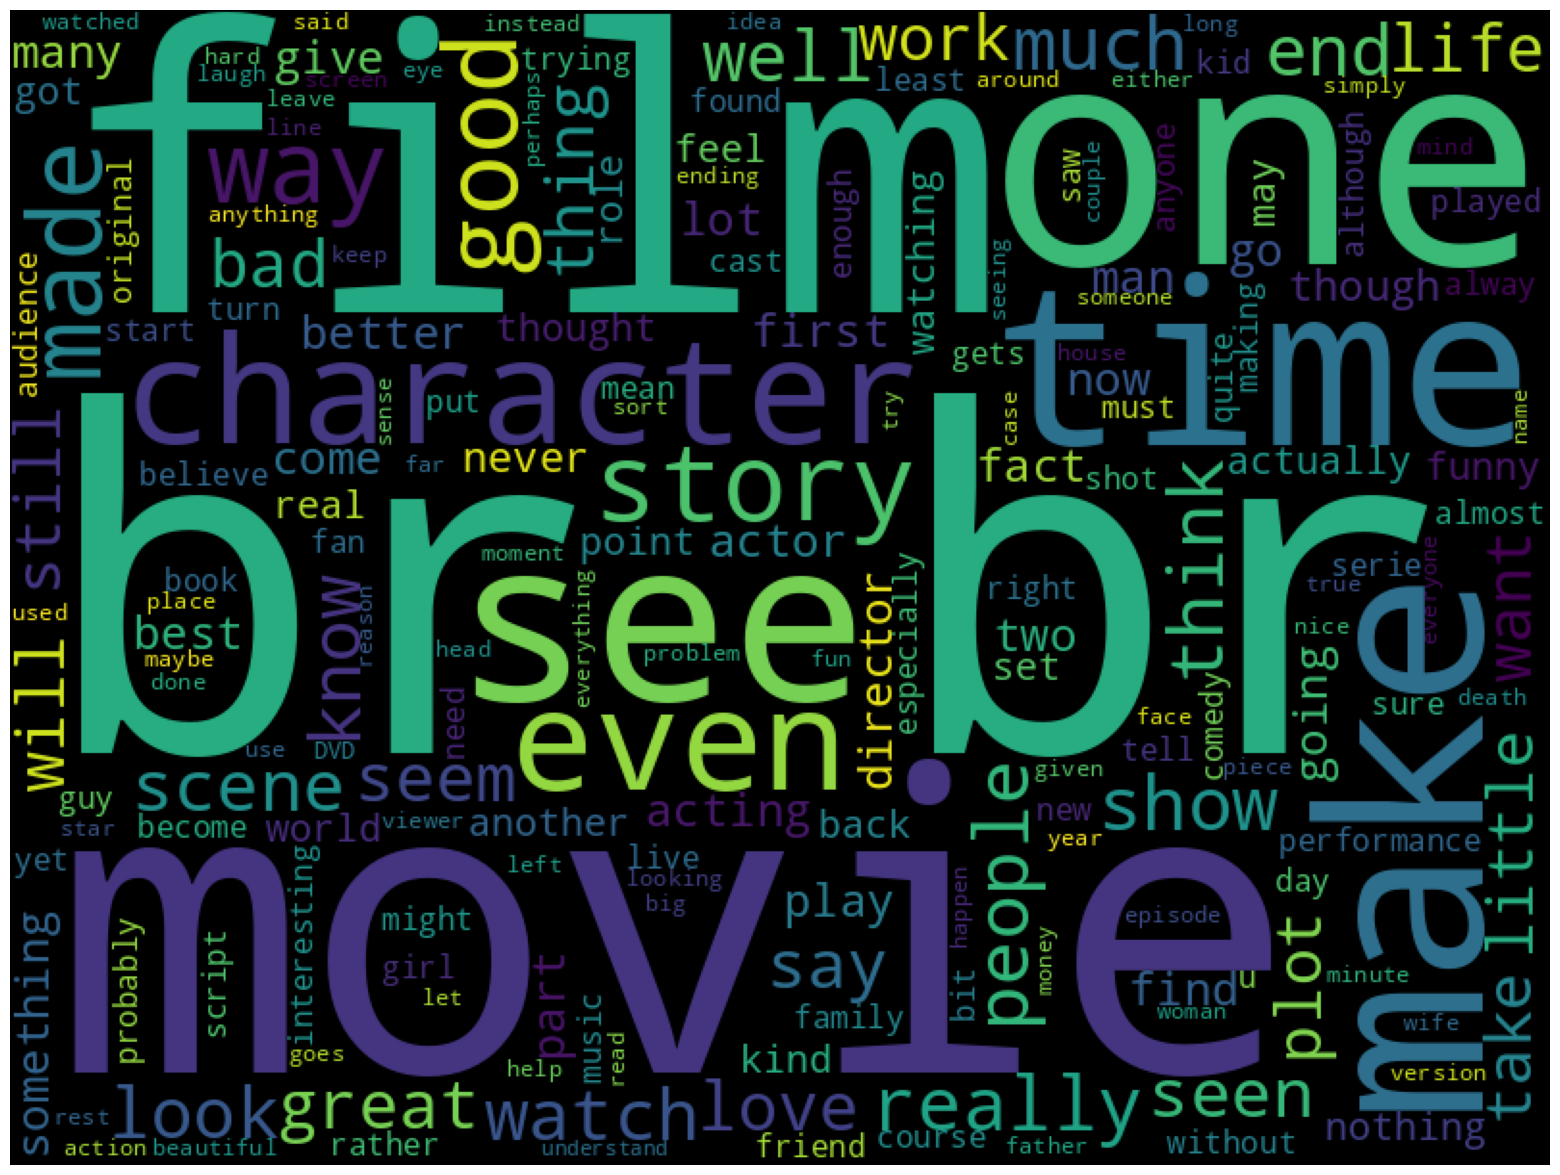

In [89]:
from wordcloud import WordCloud
cloud = WordCloud(width=800, height=600).generate(" ".join(train_data['review']))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

### 긍, 부정 데이터의 분포

<Axes: ylabel='count'>

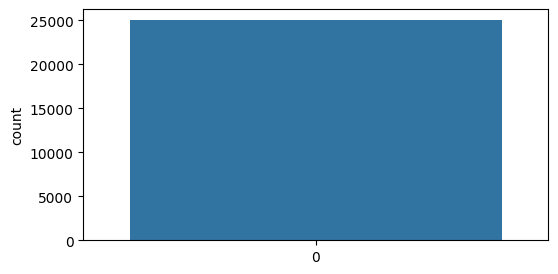

In [90]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6, 3)
sns.countplot(train_data['sentiment'])

In [91]:
print("긍정 리뷰 개수: {}".format(train_data['sentiment'].value_counts()[1]))
print("부정 리뷰 개수: {}".format(train_data['sentiment'].value_counts()[0]))

긍정 리뷰 개수: 12500
부정 리뷰 개수: 12500


### 각 리뷰의 단어 개수 분포
- train_data 데이터 프레임의 'review' 컬럼의 각 행에 대해 공백을 기준으로 분리하여 얻은 단어 개수 계산하여 train_word_counts 리스트에 저장
- lambda x:len(x.split(' '))는 문자열 'x'의 단어 개수를 반환하는 함수
- apply()는 각 행에 대해 적용하여 결과를 리스트 형태로 반환.

In [92]:
train_word_counts = train_data['review'].apply(lambda x:len(x.split(' ')))
# len(train_word_counts) # 25000
print(train_word_counts) # 리스트 문자열 길이 값 출력

0        433
1        158
2        378
3        379
4        367
        ... 
24995     95
24996    174
24997    127
24998    197
24999    184
Name: review, Length: 25000, dtype: int64


TypeError: ignored

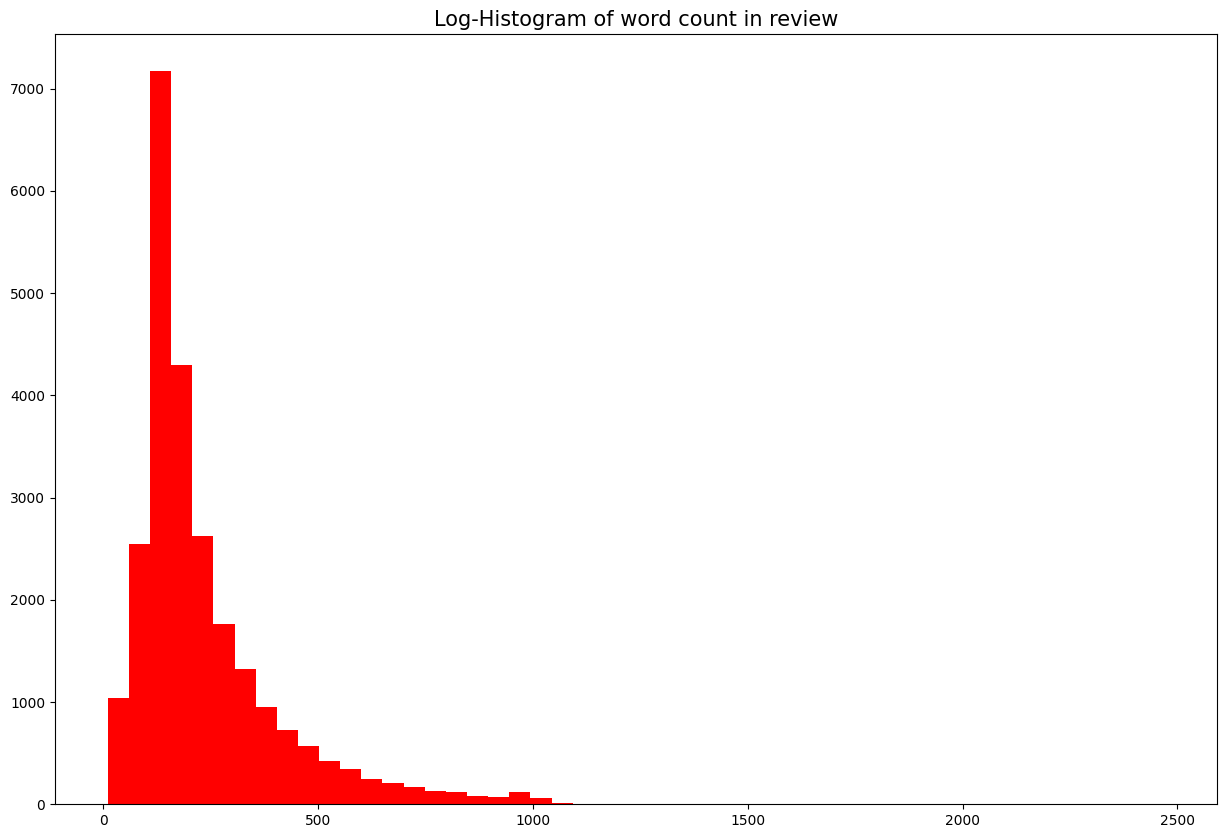

In [93]:
# 50의 데이터로 나눌 구간 bin=50 으로 구분하여 히스토그램을 그린다. 
plt.figure(figsize=(15, 10))
plt.hist(train_word_counts, bins=50, facecolor='r',label='train')
plt.title('Log-Histogram of word count in review', fontsize=15)
plt.yscale('log', nonposy='clip') # log 스케일를 지정하여 값의 분포가 넓을 경우 유용하며 값차이를 명확히 보여준다.
plt.legend()  #  nonposy='clip' 은 0 값은 잘라내어 y축에 보이지 않는다.
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Number of reviews', fontsize=15)

In [94]:
print('리뷰 단어 개수 최대 값: {}'.format(np.max(train_word_counts)))
print('리뷰 단어 개수 최소 값: {}'.format(np.min(train_word_counts)))
print('리뷰 단어 개수 평균 값: {:.2f}'.format(np.mean(train_word_counts)))
print('리뷰 단어 개수 표준편차: {:.2f}'.format(np.std(train_word_counts)))
print('리뷰 단어 개수 중간 값: {}'.format(np.median(train_word_counts)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('리뷰 단어 개수 제 1 사분위: {}'.format(np.percentile(train_word_counts, 25)))
print('리뷰 단어 개수 제 3 사분위: {}'.format(np.percentile(train_word_counts, 75)))

리뷰 단어 개수 최대 값: 2470
리뷰 단어 개수 최소 값: 10
리뷰 단어 개수 평균 값: 233.79
리뷰 단어 개수 표준편차: 173.74
리뷰 단어 개수 중간 값: 174.0
리뷰 단어 개수 제 1 사분위: 127.0
리뷰 단어 개수 제 3 사분위: 284.0


### 특수문자 및 대, 소문자 비율

In [95]:
qmarks = np.mean(train_data['review'].apply(lambda x: '?' in x)) # 물음표가 구두점으로 쓰임
fullstop = np.mean(train_data['review'].apply(lambda x: '.' in x)) # 마침표
capital_first = np.mean(train_data['review'].apply(lambda x: x[0].isupper())) #  첫번째 대문자
capitals = np.mean(train_data['review'].apply(lambda x: max([y.isupper() for y in x]))) # 대문자가 몇개
numbers = np.mean(train_data['review'].apply(lambda x: max([y.isdigit() for y in x]))) # 숫자가 몇개
                  
print('물음표가있는 질문: {:.2f}%'.format(qmarks * 100))
print('마침표가 있는 질문: {:.2f}%'.format(fullstop * 100))
print('첫 글자가 대문자 인 질문: {:.2f}%'.format(capital_first * 100))
print('대문자가있는 질문: {:.2f}%'.format(capitals * 100))
print('숫자가있는 질문: {:.2f}%'.format(numbers * 100))

물음표가있는 질문: 29.55%
마침표가 있는 질문: 99.69%
첫 글자가 대문자 인 질문: 0.00%
대문자가있는 질문: 99.59%
숫자가있는 질문: 56.66%


### 데이터 전처리

데이터 분석과정을 바탕으로 데이터를 모델에 적용시키기 위해 전처리 과정을 진행한다.

In [96]:
import re
import json
import pandas as pd
import numpy as np

from bs4 import BeautifulSoup
from nltk.corpus import stopwords

from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

In [97]:
DATA_IN_PATH = './data_in/'

train_data = pd.read_csv( DATA_IN_PATH + 'labeledTrainData.tsv', header = 0, delimiter = '\t', quoting = 3)
print(train_data['review'][0])

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

In [98]:
review = train_data['review'][0] # 리뷰 중 하나를 가져온다.
review_text = BeautifulSoup(review,"html5lib").get_text() # HTML 태그 제거
review_text = re.sub("[^a-zA-Z]", " ", review_text ) # 영어 문자를 제외한 나머지는 모두 공백으로 바꾼다.

In [99]:
print(review_text)

 With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring  Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him The actual feature film bit when it finally starts is only on for    mi

In [100]:
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english')) # 영어 불용어들의 set을 만든다.

review_text = review_text.lower()
words = review_text.split() # 소문자 변환 후 단어마다 나눠서 단어 리스트로 만든다.
words = [w for w in words if not w in stop_words] # 불용어 제거한 리스트를 만든다

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [101]:
print(words)

['stuff', 'going', 'moment', 'mj', 'started', 'listening', 'music', 'watching', 'odd', 'documentary', 'watched', 'wiz', 'watched', 'moonwalker', 'maybe', 'want', 'get', 'certain', 'insight', 'guy', 'thought', 'really', 'cool', 'eighties', 'maybe', 'make', 'mind', 'whether', 'guilty', 'innocent', 'moonwalker', 'part', 'biography', 'part', 'feature', 'film', 'remember', 'going', 'see', 'cinema', 'originally', 'released', 'subtle', 'messages', 'mj', 'feeling', 'towards', 'press', 'also', 'obvious', 'message', 'drugs', 'bad', 'kay', 'visually', 'impressive', 'course', 'michael', 'jackson', 'unless', 'remotely', 'like', 'mj', 'anyway', 'going', 'hate', 'find', 'boring', 'may', 'call', 'mj', 'egotist', 'consenting', 'making', 'movie', 'mj', 'fans', 'would', 'say', 'made', 'fans', 'true', 'really', 'nice', 'actual', 'feature', 'film', 'bit', 'finally', 'starts', 'minutes', 'excluding', 'smooth', 'criminal', 'sequence', 'joe', 'pesci', 'convincing', 'psychopathic', 'powerful', 'drug', 'lord', 

In [102]:
clean_review = ' '.join(words) # 단어 리스트들을 다시 하나의 글로 합친다.
print(clean_review)

stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate working

In [103]:
def preprocessing( review, remove_stopwords = False ): 
    # 불용어 제거는 옵션으로 선택 가능하다.
    
    # 1. HTML 태그 제거
    review_text = BeautifulSoup(review, "html5lib").get_text()	

    # 2. 영어가 아닌 특수문자들을 공백(" ")으로 바꾸기
    review_text = re.sub("[^a-zA-Z]", " ", review_text)

    # 3. 대문자들을 소문자로 바꾸고 공백단위로 텍스트들 나눠서 리스트로 만든다.
    words = review_text.lower().split()

    if remove_stopwords: 
        # 4. 불용어들을 제거
    
        #영어에 관련된 불용어 불러오기
        stops = set(stopwords.words("english"))
        # 불용어가 아닌 단어들로 이루어진 새로운 리스트 생성
        words = [w for w in words if not w in stops]
        # 5. 단어 리스트를 공백을 넣어서 하나의 글로 합친다.	
        clean_review = ' '.join(words)

    else: # 불용어 제거하지 않을 때
        clean_review = ' '.join(words)

    return clean_review

In [104]:
clean_train_reviews = []
for review in train_data['review']:
    clean_train_reviews.append(preprocessing(review, remove_stopwords = True))

# 전처리한 데이터 출력
clean_train_reviews[0]

<ipython-input-103-f709f7aa7683>:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(review, "html5lib").get_text()


'stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate workin

## 새로운 데이터 프레임'clean_train_df'을 딕셔너리 형태로 데이터를 입력한다. 
- 'review'컬럼에 clean_train_review 리스트 값이,
- 'sentiment' 컬럼에는 train_data['sentiment']시리즈의 값이 들어간다.

## Keras의 Tokenizer()을 사용하여 전처리된 리뷰 데이터인 'clean_train_reviews'을 토큰화(tokenize)하여, 각 단어를 정수로 변환하는 과정을 수행
- fit_on_texts(clean_train_reviews)는 Tokenizer()객체에 clean_train_reviews 데이터를 입력 하여, 데이터 내의 모든 단어들을 분석하고, 단어에 고유한 정수 인덱스를 부여한다.
-  tokenizer.texts_to_sequences(clean_train_reviews)sms 'clean_train_reviews' 데이터를 인덱스화된단어들로 바꾸어 반환한다. 이로써 단어 수준의 데이터가 정수 수준의 데이터로 변환된다.(정수 인코딩)

## word_vocab = tokenizer.word_index 
-  tokenizer 객체를 이용하여 텍스트 데이터를 정수 시퀀스로 변환후 dict 'word_vocab'를 생성한다.
- 이 딕셔너리는 단어를 키(key)로 해당 단어의 정수 인덱스를 값(value)으로 갖는다.
- word_vocab["<PAD>"] = 0 : '<PAD>'특수 토큰에 대한 인덱스를 0으로 할당. 
- <PAD> 토큰은 시퀀스 길이를 맞추기위해사용되면 이를 위한 패딩 작업에서는 0으로 채워질 것이다.


In [105]:
clean_train_df = pd.DataFrame({'review': clean_train_reviews, 'sentiment': train_data['sentiment']})

In [106]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_train_reviews)
text_sequences = tokenizer.texts_to_sequences(clean_train_reviews)

In [107]:
print(text_sequences[0])

[404, 70, 419, 8815, 506, 2456, 115, 54, 873, 516, 178, 18686, 178, 11242, 165, 78, 14, 662, 2457, 117, 92, 10, 499, 4074, 165, 22, 210, 581, 2333, 1194, 11242, 71, 4826, 71, 635, 2, 253, 70, 11, 302, 1663, 486, 1144, 3265, 8815, 411, 793, 3342, 17, 441, 600, 1500, 15, 4424, 1851, 998, 146, 342, 1442, 743, 2424, 4, 8815, 418, 70, 637, 69, 237, 94, 541, 8815, 26055, 26056, 120, 1, 8815, 323, 8, 47, 20, 323, 167, 10, 207, 633, 635, 2, 116, 291, 382, 121, 15535, 3315, 1501, 574, 734, 10013, 923, 11578, 822, 1239, 1408, 360, 8815, 221, 15, 576, 8815, 22224, 2274, 13426, 734, 10013, 27, 28606, 340, 16, 41, 18687, 1500, 388, 11243, 165, 3962, 8815, 115, 627, 499, 79, 4, 8815, 1430, 380, 2163, 114, 1919, 2503, 574, 17, 60, 100, 4875, 5100, 260, 1268, 26057, 15, 574, 493, 744, 637, 631, 3, 394, 164, 446, 114, 615, 3266, 1160, 684, 48, 1175, 224, 1, 16, 4, 8815, 3, 507, 62, 25, 16, 640, 133, 231, 95, 7426, 600, 3439, 8815, 37248, 1864, 1, 128, 342, 1442, 247, 3, 865, 16, 42, 1487, 997, 2333, 12

In [108]:
word_vocab = tokenizer.word_index 
word_vocab["<PAD>"] = 0
type(word_vocab)

dict

In [109]:
print("전체 단어 개수: ", len(word_vocab))

전체 단어 개수:  74066


In [110]:
word_vocab

{'movie': 1,
 'film': 2,
 'one': 3,
 'like': 4,
 'good': 5,
 'time': 6,
 'even': 7,
 'would': 8,
 'story': 9,
 'really': 10,
 'see': 11,
 'well': 12,
 'much': 13,
 'get': 14,
 'bad': 15,
 'people': 16,
 'also': 17,
 'first': 18,
 'great': 19,
 'made': 20,
 'way': 21,
 'make': 22,
 'could': 23,
 'movies': 24,
 'think': 25,
 'characters': 26,
 'character': 27,
 'watch': 28,
 'two': 29,
 'films': 30,
 'seen': 31,
 'many': 32,
 'life': 33,
 'plot': 34,
 'acting': 35,
 'never': 36,
 'love': 37,
 'little': 38,
 'best': 39,
 'show': 40,
 'know': 41,
 'ever': 42,
 'man': 43,
 'better': 44,
 'end': 45,
 'still': 46,
 'say': 47,
 'scene': 48,
 'scenes': 49,
 'go': 50,
 'something': 51,
 'back': 52,
 'real': 53,
 'watching': 54,
 'though': 55,
 'thing': 56,
 'old': 57,
 'years': 58,
 'actors': 59,
 'director': 60,
 'work': 61,
 'another': 62,
 'new': 63,
 'nothing': 64,
 'funny': 65,
 'actually': 66,
 'makes': 67,
 'look': 68,
 'find': 69,
 'going': 70,
 'part': 71,
 'lot': 72,
 'every': 73,
 'wo

In [111]:
# 생성된 단어 사전 'word_vocab'을 data_config 딕셔너리 객체에 저장한다.
# 이때 'vocab' 키에는 'word_vocab' 딕셔너리를, 'vocab_size'키에는 'word_vocab'딕셔너리 길이를 저장
# 이렇게 저장된 data_config는 모델 학습하거나 추론할 때 사용될 수 있다.

data_configs = {}

data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab)

print("vocab:", data_configs['vocab'])
print("vocab_size:", data_configs['vocab_size'])

vocab: {'movie': 1, 'film': 2, 'one': 3, 'like': 4, 'good': 5, 'time': 6, 'even': 7, 'would': 8, 'story': 9, 'really': 10, 'see': 11, 'well': 12, 'much': 13, 'get': 14, 'bad': 15, 'people': 16, 'also': 17, 'first': 18, 'great': 19, 'made': 20, 'way': 21, 'make': 22, 'could': 23, 'movies': 24, 'think': 25, 'characters': 26, 'character': 27, 'watch': 28, 'two': 29, 'films': 30, 'seen': 31, 'many': 32, 'life': 33, 'plot': 34, 'acting': 35, 'never': 36, 'love': 37, 'little': 38, 'best': 39, 'show': 40, 'know': 41, 'ever': 42, 'man': 43, 'better': 44, 'end': 45, 'still': 46, 'say': 47, 'scene': 48, 'scenes': 49, 'go': 50, 'something': 51, 'back': 52, 'real': 53, 'watching': 54, 'though': 55, 'thing': 56, 'old': 57, 'years': 58, 'actors': 59, 'director': 60, 'work': 61, 'another': 62, 'new': 63, 'nothing': 64, 'funny': 65, 'actually': 66, 'makes': 67, 'look': 68, 'find': 69, 'going': 70, 'part': 71, 'lot': 72, 'every': 73, 'world': 74, 'cast': 75, 'us': 76, 'quite': 77, 'want': 78, 'things':

In [112]:
MAX_SEQUENCE_LENGTH = 174  # 리뷰 단어 개수 중간 값: 174.0

train_inputs = pad_sequences(text_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

print('Shape of train data: ', train_inputs.shape)

# 'text_sequences'는 pad_sequences()패딩 처리된 train_inputs 정수 시퀀스 데이터가 저장된  numpy 배열 출력
print(train_inputs)

Shape of train data:  (25000, 174)
[[  411   793  3342 ... 18689   316  1356]
 [  232   203  3048 ...     0     0     0]
 [ 1416  2366  1362 ...   700  1175  5310]
 ...
 [  117  3104    14 ...     0     0     0]
 [  639   516 16593 ...     0     0     0]
 [  109     1   350 ...     0     0     0]]


In [113]:
train_labels = np.array(train_data['sentiment'])
print('Shape of label tensor:', train_labels.shape)

Shape of label tensor: (25000,)


In [114]:
TRAIN_INPUT_DATA = 'train_input.npy'
TRAIN_LABEL_DATA = 'train_label.npy'
TRAIN_CLEAN_DATA = 'train_clean.csv'
DATA_CONFIGS = 'data_configs.json'

import os
# 저장하는 디렉토리가 존재하지 않으면 생성
if not os.path.exists(DATA_IN_PATH):
    os.makedirs(DATA_IN_PATH)

In [115]:
# 전처리 된 데이터를 넘파이 형태로 저장
np.save(open(DATA_IN_PATH + TRAIN_INPUT_DATA, 'wb'), train_inputs)
np.save(open(DATA_IN_PATH + TRAIN_LABEL_DATA, 'wb'), train_labels)

# 정제된 텍스트를 csv 형태로 저장
clean_train_df.to_csv(DATA_IN_PATH + TRAIN_CLEAN_DATA, index = False)


# 데이터 사전을 json 형태로 저장
json.dump(data_configs, open(DATA_IN_PATH + DATA_CONFIGS, 'w'), ensure_ascii=False)

1. 'testData.tsv' 읽어와서 test_data 프레임을 생성한다.
2. test_data의 'review'에 대해 전처리(preprocessing)를 수행한다. 여기서 불용요(stopwords)를 제거한 후 clean_test_reviews 리스트에 저장한다.
3. 'clean_test_rivews'와'test_dat' 데이터프레임의 'id'열을 이용하여 'clean_test_df' 데이터 프레임 생성한다.
4. 'test_data'프레임의 'id'열을 np.array()함수를 이용하여 test_id 배열에 저장 한다.
5. 'clean_test_reviews'데이터를 인덱스화된 단어들로 바꾸어 반환한다. 이를 통해 단어 수준의 데이터가 정수 수준의 데이터로 변환
6. 'pad_sequences()'함수로 시퀀스 길이를 'MAX_SEQUENCE_LENGTH'에 맞게 패딩한다.
7. 'test_inputs'는 이후 모델의 입력 값으로 사용될 것이다.

In [116]:
test_data = pd.read_csv(DATA_IN_PATH + "testData.tsv", header=0, delimiter="\t", quoting=3)

clean_test_reviews = []
for review in test_data['review']:
    clean_test_reviews.append(preprocessing(review, remove_stopwords = True))


clean_test_df = pd.DataFrame({'review': clean_test_reviews, 'id': test_data['id']})
test_id = np.array(test_data['id'])

text_sequences = tokenizer.texts_to_sequences(clean_test_reviews)
test_inputs = pad_sequences(text_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

<ipython-input-103-f709f7aa7683>:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(review, "html5lib").get_text()


In [117]:
TEST_INPUT_DATA = 'test_input.npy'
TEST_CLEAN_DATA = 'test_clean.csv'
TEST_ID_DATA = 'test_id.npy'

# 데이터를 저장하는 코드
# 'test_inputs' 변수에 저장된 Numpy 배열 데이터를 'DATA_IN_PATH + TEST_INPUT_DATA'경로에 바이너리 파일 형태로 저장한다.
np.save(open(DATA_IN_PATH + TEST_INPUT_DATA, 'wb'), test_inputs)
np.save(open(DATA_IN_PATH + TEST_ID_DATA, 'wb'), test_id)

# 'clean_test_df'데이터프레임을 'DATA_IN_PATH + TEST_CLEAN_DATA'경로에 CSV파일 형태로 저장, 인덱스는 저장하지 않는다.
clean_test_df.to_csv(DATA_IN_PATH + TEST_CLEAN_DATA, index = False)

# 언어 전처리 과정
1. sentence
2. Tokenization
3. Cleaning
4. Padding
5. Encodng

# 모델 구현

## 4.1.4 Logistic Regression Example with TF-IDF

### TF-IDF Feature Example

In [118]:
import os

import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [119]:
DATA_IN_PATH = './data_in/' 
DATA_OUT_PATH = './data_out/'
TRAIN_CLEAN_DATA = 'train_clean.csv'

RANDOM_SEED = 42
TEST_SPLIT = 0.2

In [120]:
train_data = pd.read_csv( DATA_IN_PATH + TRAIN_CLEAN_DATA )

In [121]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [123]:
reviews = list(train_data['review'])
sentiments = list(train_data['sentiment'])

In [124]:
vectorizer = TfidfVectorizer(min_df = 0.0, analyzer="char", sublinear_tf=True, ngram_range=(1,3), max_features=5000) 

X = vectorizer.fit_transform(reviews)
y = np.array(sentiments)

In [125]:
X

<25000x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 17862871 stored elements in Compressed Sparse Row format>

In [128]:
features = vectorizer.get_feature_names_out()

In [129]:
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=TEST_SPLIT, random_state=RANDOM_SEED)

In [130]:
lgs = LogisticRegression(class_weight='balanced') 
lgs.fit(X_train, y_train) 

LogisticRegression(class_weight='balanced')

In [131]:
predicted = lgs.predict(X_eval)

In [132]:
print("Accuracy: %f" % lgs.score(X_eval, y_eval))

Accuracy: 0.859800


In [133]:
TEST_CLEAN_DATA = 'test_clean.csv'

test_data = pd.read_csv(DATA_IN_PATH + TEST_CLEAN_DATA)

In [134]:
testDataVecs = vectorizer.transform(test_data['review'])

In [135]:
test_predicted = lgs.predict(testDataVecs)
print(test_predicted)

[1 0 1 ... 0 1 0]


In [138]:
if not os.path.exists(DATA_OUT_PATH):
    os.makedirs(DATA_OUT_PATH)
# 'test_data' 데이터 프레임에서 'id'열과 모델 예측결과인 'test_predicted'변수를 'sentiment'열로 갖는 'answer_dataset' 데이터 프레임 생성
answer_dataset = pd.DataFrame({'id': test_data['id'], 'sentiment': test_predicted})

#'answer_dataset'데이터셋 프레임은 DATA_OUT_PATH + 'lgs_tfidf_answer.csv'경로에 CSV파일 형태로 저장
# 'quoting=3'필드에 큰 따옴표가 있으면 "He said, ""i love you.""" 
# => "He said, """"i love you.""""""로 처리하여 필드 내 따옴표를 두 배로 변경하여 데이터를 안전하게 처리 할 수 있다.
answer_dataset.to_csv(DATA_OUT_PATH + 'lgs_tfidf_answer.csv', index=False, quoting=3)

In [141]:
import pandas as pd

answer = pd.read_csv('/content/data_out/lgs_tfidf_answer.csv')
print(answer.head())
print("-----------------------------")
print(test_data)

         id  sentiment
0  12311_10          1
1    8348_2          0
2    5828_4          1
3    7186_2          0
4   12128_7          1
-----------------------------
                                                  review          id
0      naturally film main themes mortality nostalgia...  "12311_10"
1      movie disaster within disaster film full great...    "8348_2"
2      movie kids saw tonight child loved one point k...    "5828_4"
3      afraid dark left impression several different ...    "7186_2"
4      accurate depiction small time mob life filmed ...   "12128_7"
...                                                  ...         ...
24995  sony pictures classics looking sony got rights...   "2155_10"
24996  always felt ms merkerson never gotten role fit...     "59_10"
24997  disappointed movie familiar case read mark fuh...    "2531_1"
24998  opening sequence filled black white shots remi...    "7772_8"
24999  great horror film people want vomit retching g...  "11465_10"

[25